In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from numpy import vstack
import pandas as pd

# import seaborn
import seaborn as sns
%matplotlib inline

In [2]:
cars = pd.read_csv("cars.tsv", sep="\t")

In [3]:
cars.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [6]:
dist = cars.dist.values
speed = cars.speed.values
dist

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85], dtype=int64)

Text(0.5, 0, 'Distances taken to stop (feet)')

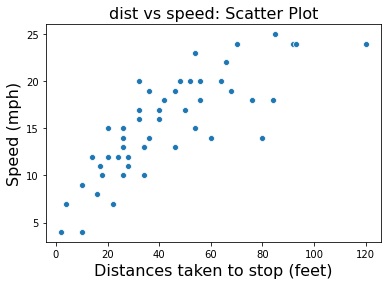

In [5]:
bplot= sns.scatterplot('dist','speed',data=cars)
bplot.axes.set_title("dist vs speed: Scatter Plot",
                    fontsize=16)
bplot.set_ylabel("Speed (mph)", 
                fontsize=16)
bplot.set_xlabel("Distances taken to stop (feet)", 
                fontsize=16)

In [8]:
# Setup matrices
mat = np.shape(dist)[0]
#A_mat = np.matrix([np.ones(m),A]).T
dist_mat = np.vstack((np.ones(len(dist)), dist)).T
speed_mat = np.matrix(speed).T
dist

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85], dtype=int64)

In [9]:
print(mat)
print()
print(dist_mat[0:5,])
print()
print(speed_mat[0:5,])

50

[[ 1.  2.]
 [ 1. 10.]
 [ 1.  4.]
 [ 1. 22.]
 [ 1. 16.]]

[[4]
 [4]
 [7]
 [7]
 [8]]


In [10]:
#This is Transpose of the Matric
def transpose( A):
        res = []
        for i in range(len(A[0])):
            temp = []
            for j in range(len(A)):
                temp.append(A[j][i])
            res.append(temp)
        return np.asarray(res)

In [11]:
# Code to check the Dot Multiplication is Possible with the Matric mxn & n&m
#Multiplication of Matrix
def matrix_multiply(A, B):

# Section 1: Ensure A & B dimensions are correct for multiplication
    rowsA = len(A)
    colsA = len(A[0])
    rowsB = len(B)
    colsB = len(B[0])
    if colsA != rowsB:
        raise ArithmeticError(
            'Number of A columns must equal number of B rows.')
# Section 2: Store matrix multiplication in a new matrix
    C = zeros_matrix(rowsA, colsB)
    for i in range(rowsA):
        for j in range(colsB):
            total = 0
            for ii in range(colsA):
                total += A[i][ii] * B[ii][j]
            C[i][j] = total
    return np.asarray(C)


In [12]:
def zeros_matrix(rows, cols):

    M = []
    while len(M) < rows:
        M.append([])
        while len(M[-1]) < cols:
            M[-1].append(0.0)
    return np.asarray(M)

In [14]:
#p_mat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
dist_mat_T = transpose(dist_mat)
dist_mat_T

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.],
       [  2.,  10.,   4.,  22.,  16.,  10.,  18.,  26.,  34.,  17.,  28.,
         14.,  20.,  24.,  28.,  26.,  34.,  34.,  46.,  26.,  36.,  60.,
         80.,  20.,  26.,  54.,  32.,  40.,  32.,  40.,  50.,  42.,  56.,
         76.,  84.,  36.,  46.,  68.,  32.,  48.,  52.,  56.,  64.,  66.,
         54.,  70.,  92.,  93., 120.,  85.]])

In [15]:
dist_mat_T_speed_mat = matrix_multiply(dist_mat_T,speed_mat)
dist_mat_T_speed_mat

array([[  770.],
       [38482.]])

In [18]:
dist_mat_T_dist_mat = matrix_multiply(dist_mat_T,dist_mat)
dist_mat_T_dist_mat

array([[5.00000e+01, 2.14900e+03],
       [2.14900e+03, 1.24903e+05]])

In [20]:
mat_Inverse = np.linalg.inv(dist_mat_T_dist_mat)
mat_Inverse

array([[ 7.67713063e-02, -1.32087730e-03],
       [-1.32087730e-03,  3.07323708e-05]])

In [22]:
beta_hat = matrix_multiply(mat_Inverse,dist_mat_T_speed_mat)
beta_hat

array([[8.28390564],
       [0.16556757]])

In [23]:
yhat = matrix_multiply(dist_mat,beta_hat)
yhat[0:5,]

array([[ 8.61504079],
       [ 9.93958139],
       [ 8.94617594],
       [11.92639228],
       [10.93298684]])

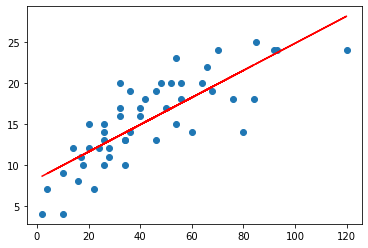

In [25]:
plt.scatter(dist, speed)
plt.plot(dist, yhat, color='red')